<!--NAVIGATION-->
<a href="https://colab.research.google.com/github/marcoteran/deeplearningmodule/blob/main/03_convolutionalneuralnetwork/03_convolutionalneuralnetwork.ipynb" target="_blank"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab" title="Abrir y ejecutar en Google Colaboratory"></a>

## Ejemplos de código
# Deep Learning: Redes Neuronales Convolucionales

*Name:* Marco Teran
*E-mail:* marco.tulio.teran@gmail.com,
[Website](http://marcoteran.github.io/),
[Github](https://github.com/marcoteran),
[LinkedIn](https://www.linkedin.com/in/marcoteran/).

### Importar librerías importantes

Empezamos con las importaciones estándar:

In [1]:
import warnings
warnings.filterwarnings('ignore')
#import mlutils
import numpy as np
import pandas as pd
import importlib
#importlib.reload(mlutils)
#reload(mlutils) Python2

# Visualizations
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()  # for plot styling
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline

# Machine learning
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from IPython.display import HTML
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.stats import mode
from sklearn.metrics import pairwise_distances_argmin

In [2]:
# Deep learning
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.11.0


# ¿Qué son las Redes convolucionales?

Una **red neuronal convolucional** es un tipo de red neuronal artificial donde las neuronas corresponden a campos receptivos de una manera muy similar a las neuronas en la corteza visual primaria (V1) de un cerebro biológico. Este tipo de red es una variación de un perceptron multicapa, sin embargo, debido a que su aplicación es realizada en matrices bidimensionales, son muy efectivas para tareas de visión artificial, como en la clasificación y segmentación de imágenes, entre otras aplicaciones.
![CNN](https://pedrofrodenas.github.io/assets/images/net.png)

# Ejemplo 1: clasificación de digitos MNIST

Tutorial de Deep Learning con Keras para clasificar la base de datos MNIST.

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Reshape
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

## Carga de la base de datos MNIST
Nota que al ser una base de datos tan popular ya existen scripts para descargar, descomprimir y formar el conjunto de datos de entreno y de test.
En un caso real, hay que programar las funciones que se encarguen de la descarga, la importación, la unificación de las imagenes para que todas tengan el mismo tamaño, etc… Este paso normalmente es de los que ocupan más tiempo.

Los datos del MNIST están disponibles directamente en el API de los conjuntos de datos de tf.keras. Lo cargas así:

In [6]:
# Para descargar la base de datos MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Tamaño de:")
print (train_images.shape)
print (train_labels.shape)

print("Tamaño de:")
print("- Set de entranamiento:\t{}".format(len(train_images)))
print("- Set de testeo:\t\t{}".format(len(test_images)))

Tamaño de:
(60000, 28, 28)
(60000,)
Tamaño de:
- Set de entranamiento:	60000
- Set de testeo:		10000


El conjunto de datos MNIST ahora se ha cargado y consiste en 70,000 imágenes y números de clase para las imágenes. El conjunto de datos se divide en 3 subconjuntos. Uno se utiliza para entrenar la red, otro para testearla y otro para validar que el entreno se este realizando correctamente.

MNIST contiene imagenes de números manuscritos que van desde el 0 hasta el 9, por tanto tenemos 10 clases a clasificar. Las imagenes se almacenan en un vector y las etiquetas en otro.
Las etiquetas sirven para decirle a la red que número es una determinada imagen a la hora de entrenar. En la fase de test sirven para comprobar si la red neuronal ha clasificado bien un determinado número.

2


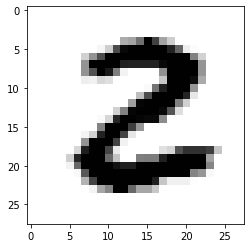

In [7]:
picnumber=25
plt.imshow(train_images[picnumber], cmap=plt.cm.binary)
# Ver la etiqueta
print(train_labels[picnumber])

### Preprocesado de datos de entrada 

In [8]:

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Cambio a variables categoricas

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28, 1)
(60000, 10)


In [9]:
print(test_labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Construcción de una Red neuronal concolucional

Keras dispone de dos modos para construir una arquitectura de red, el sequential mode y el functional mode. En este tutorial usaremos el sequential mode que es el más simple.

En el sequential mode se añaden capas de neuronas para formar la arquitectura neuronal. En la primera capa se deben especificar las dimensiones de los datos de entrada.
En nuestro caso las imagenes se encuentran en un vector de una fila y 28*28 columnas. Una vez introducido el vector a la red hay que modificarlo para que se realice la convolución correctamente. Transformando el vector de [1, 784] a una matriz de [28, 28] que es la imagen que se puede visualizar.

In [10]:
# Llamamos al constructor del modelo sequential
model = Sequential()

# Capa convolucional con funcion de activacion ReLU y max-pooling.
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

Comprobar la estructura de la red
Para comprobar la estructura de la red y el número de parámetros entrenables usamos la siguiente sentencia.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


Definición de una red convolucional de más capas

In [12]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


Ultima capa de la red, del tipo Dense. Nota que hay ``num_classes=10`` neuronas en esta capa. La clasificacion
se hara comprobando que neurona obtiene a la salida un numero mayor.

In [13]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

Comprobar la estructura de la red

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)               

## Compilación del modelo

Se ha definido la estructura de la red neuronal convolucional, ahora hay que añadir el tipo de optimizador y las métricas que se van a utilizar.

Los modelos de Deep Learning generalmente son entrenados por un optimizador de descenso de gradiente estocástico. Hay muchas variaciones de descendencia de gradiente estocástica: ``Adam``, ``RMSProp``, ``Adagrad``, etc. Todas permiten establecer el learning rate.
Cuando más pequeño sea este parámetro más tardará la red en entrenar y más precisión se obtendrá para el conjunto de datos de entreno. Hay que elegir un learning rate optimo para cada problema de Deep Learning. Si es muy pequeño la red aprenderá del ruido que hay en todas las imágenes y no de la función subyacente que relaciona las entradas y las salidas.

Cuando se da este problema se obtiene una gran precisión para el conjunto de datos de entreno y disminuye para el de test porque la red se ha especializado en reconocer el conjunto de datos para el que ha sido entrenada y ha perdido la habilidad de generalizar para otros casos. Este problema se conoce como overfitting

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## Entrenamiento de la red

Ahora que ya se ha definido la estructura de red, el optimizador, learning rate y metricas ya se puede entrenar la red.

* Mientras se va entrenando la red aparece la cantidad de épocas o epoch completadas. Una época o epoch es cuando la red ha visto todas las imagenes que contiene la base de datos. El número de epocas será otro hiperparámetro a elegir.
* No es posible entrenar la red pasandole todas las imágenes a la vez porque la memoria RAM es un recurso limitado.
* Por tanto se le pasan en grupos de un determinado número de imagenes conocido como batch size, cuento más grande sea este parámetro menos se tardará en completar el entreno. El batch size estrá limitado por la memoria RAM del computador.

In [16]:
model.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

Epoch 1/5
600/600 [==============================] - 63s 102ms/step - loss: 0.9701 - accuracy: 0.7617
Epoch 2/5
600/600 [==============================] - 62s 103ms/step - loss: 0.2640 - accuracy: 0.9221
Epoch 3/5
600/600 [==============================] - 71s 117ms/step - loss: 0.1891 - accuracy: 0.9442
Epoch 4/5
600/600 [==============================] - 61s 102ms/step - loss: 0.1498 - accuracy: 0.9560
Epoch 5/5
600/600 [==============================] - 63s 105ms/step - loss: 0.1259 - accuracy: 0.9631


### Evaluación de la red
Para ver si la red ha aprendido a clasificar bien los números manuscritos hay que comprobar la precisión que obtiene en el conjunto de datos de test. Para este conjunto no ha sido entrenada la red.

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 5s 14ms/step - loss: 0.1050 - accuracy: 0.9688
Test accuracy: 0.9688000082969666


El parámtro ``test_acc`` es la precisión que ha obtenido la red para el conjunto de entreno.
Ahora hay que comprobar si clasifica bien las imágenes del conjunto de test. Estas imágenes aún no las ha visto la red y no tiene información de ellas.

### Guardar el modelo
Es útil gurdar un modelo que ha sido entrenado satisfactoriamente para su posterior uso. De esta manera no hay que entrenar de nuevo la red y se pueden realizar prediciones con el modelo guardado.

* **NOTA:** Será necesario instalar el paquete h5py para poder guardar modelos.

In [18]:
# Definir la carpeta donde se guarda el modelo y su nombre.
# En este caso se guarda en el mismo directorio que contiene este script
nombre_model = 'modelo.h5'

# Guardamos el modelo y todos los pesos entrenados
model.save(nombre_model)

# Ejemplo 2: Conjunto de datos Fashion-MNIST

Echemos un vistazo a un escenario en el que podemos reconocer diferentes prendas de vestir, entrenadas a partir de un conjunto de datos que contiene 10 tipos diferentes.

![Datos Fashion-MNIST](https://www.researchgate.net/profile/Greeshma_K_V/publication/340299295/figure/fig1/AS:875121904476163@1585656729996/Fashion-MNIST-Dataset-Images-with-Labels-and-Description-II-LITERATURE-REVIEW-In-image.jpg)

## Carga de datos

Los datos del MNIST de la moda están disponibles directamente en el API de los conjuntos de datos de tf.keras. Lo cargas así:

In [19]:
fashion_mnist = keras.datasets.fashion_mnist

Llamar a ``load_data`` en el objeto le dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

In [20]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

¿Cómo son estos valores? Imprimamos una imagen de entrenamiento, y una etiqueta de entrenamiento para ver... Experimentemos con diferentes índices en la matriz.

9


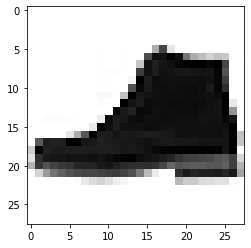

In [22]:
picnumber=42
plt.imshow(train_images[picnumber], cmap=plt.cm.binary)
# Ver la etiqueta
print(train_labels[picnumber])

In [23]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

### Modelo 1: modelo de base basado en el mismo modelo que el usado para el conjunto datos digits MNIST 

In [24]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [26]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 74s 38ms/step - loss: 0.8377 - accuracy: 0.7039
Epoch 2/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.5181 - accuracy: 0.8152
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.4558 - accuracy: 0.8376
Epoch 4/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.4190 - accuracy: 0.8518
Epoch 5/5
313/313 [==============================] - 4s 11ms/step - loss: 0.4292 - accuracy: 0.8469
Test accuracy: 0.8468999862670898


In [27]:
predictions = model.predict(test_images)

313/313 [==============================] - 4s 10ms/step


In [28]:
predictions[5]

array([1.1306235e-05, 9.9996042e-01, 1.3756360e-07, 2.1212550e-06,
       1.7147715e-05, 1.4474062e-10, 1.2980321e-06, 5.5712162e-12,
       7.5194253e-06, 1.0998654e-13], dtype=float32)

In [29]:
test_labels[5]

1

In [30]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)    

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('black')

In [31]:
train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))

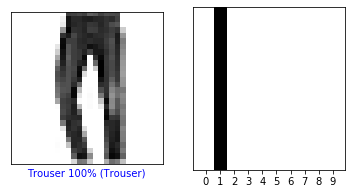

In [32]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

## Mejoramiento de los modelos

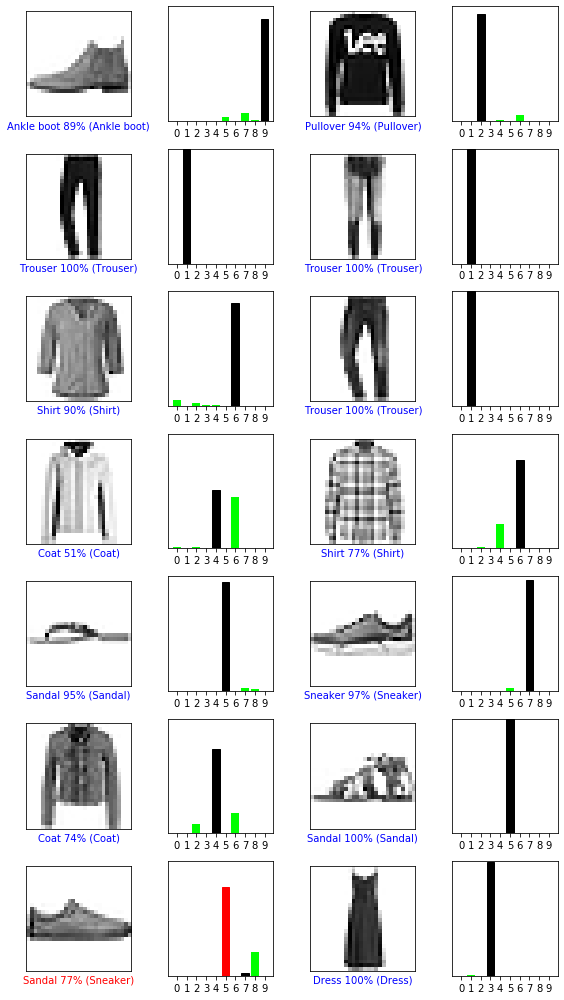

In [33]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [34]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

### Modelo 2: Duplicando las neuronas de modelo base y añadiendo una capa densa de 64 neuronas

In [35]:
model = Sequential()

model.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [36]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 175s 93ms/step - loss: 0.7631 - accuracy: 0.7233
Epoch 2/5
1875/1875 [==============================] - 185s 99ms/step - loss: 0.4967 - accuracy: 0.8202
Epoch 3/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.4257 - accuracy: 0.8468
Epoch 4/5
1875/1875 [==============================] - 189s 101ms/step - loss: 0.3888 - accuracy: 0.8602
Epoch 5/5
313/313 [==============================] - 10s 32ms/step - loss: 0.3753 - accuracy: 0.8637

Test accuracy: 0.8636999726295471


### Modelo 3: modelo 3 cambiando al optimizador 'adam'

In [37]:
model = Sequential()

model.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 205s 108ms/step - loss: 0.4123 - accuracy: 0.8510
Epoch 2/5
1875/1875 [==============================] - 196s 105ms/step - loss: 0.2734 - accuracy: 0.8991
Epoch 3/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.2304 - accuracy: 0.9147
Epoch 4/5
1875/1875 [==============================] - 182s 97ms/step - loss: 0.2013 - accuracy: 0.9245
Epoch 5/5
313/313 [==============================] - 9s 27ms/step - loss: 0.2576 - accuracy: 0.9098

Test accuracy: 0.9097999930381775


### Modelo 4: Buscando un modelo más complejo que usa capas BatchNormalization y Dropout

Crearemos una función que permita recrear una red convolucional

In [38]:
from tensorflow.keras.layers import Dropout, BatchNormalization


def make_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(28,28,1)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [ ]:
model = make_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
 667/1875 [=========>....................] - ETA: 10:28 - loss: 0.6849 - accuracy: 0.7705

### Modelo 5: Modelo anterior añadiendo más epochs (10 epochs)

In [ ]:
model = make_model()


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

### Modelo 6: Modelo anterior añadiendo más epochs (30 epochs)

In [ ]:
model = make_model()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=30)
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

### Modelo 7: Modelo anterior añadiendo más epochs (30 epochs) y diferentes hiperparámetros al optimizador Adam

In [ ]:
model = make_model()

optimizer = tf.keras.optimizers.Adam (lr=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

model.fit(train_images, train_labels, epochs=30, callbacks=[reduce_lr])

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

In [ ]:
predictions = model.predict(test_images)

train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))


num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)     
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

## Referencias generales

- [Redes neuronales convolucionales](https://es.wikipedia.org/wiki/Redes_neuronales_convolucionales)
- [Convolutional Neural Network (CNN) with TensorFlow](https://www.tensorflow.org/tutorials/images/cnn)

<!--NAVIGATION-->
<a href="https://colab.research.google.com/github/marcoteran/deeplearningmodule/blob/main/06_dataaugmentationandtransferlearning/06_dataaugmentationandtransferlearning.ipynb" target="_blank"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab" title="Abrir y ejecutar en Google Colaboratory"></a>

## Ejemplos de código
# Deep Learning:  *Data Augmentation* y *Transfer Learning*

- *Name:* Marco Teran
- *E-mail:* marco.teran@usa.edu.co
- [Website](http://marcoteran.github.io/), [Github](https://github.com/marcoteran), [LinkedIn](https://www.linkedin.com/in/marcoteran/).


[**Slide del tema** ](https://github.com/marcoteran/deeplearningmodule/raw/main/05_deeplearning_generativeadversialnetworks.pdf)

### Importar librerías importantes

Empezamos con las importaciones estándar:

In [ ]:
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

## Introducción

Data Augmentation: una de las técnicas más populares para mitigar el sobreajuste en los modelos de redes neuronales. En nuestro caso de estudio, esta técnica mejorará el modelo del capítulo anterior, que presentaba una precisión de 73.9 %, alcanzando una precisión de 80.1 %. Transfer Learning: permitirá mejorar aún más el modelo anterior.
Primero presentaremos la técnica Feature Extraction usando una red preentrenada que nos llevará a una precisión de 90.4 % y, después, la técnica Fine-Tuning de una red preentrenada que nos llevará a una precisión de 93.1 %

## Data Augmentation

Cuantos menos datos tengamos, menos datos para entrenar y menos posibilidades tendremos de obtener predicciones precisas para datos que nuestro modelo aún no ha visto. Data Augmentation adopta el enfoque de generar más datos de entrenamiento a partir de nuestros datos disponibles. En el caso de imágenes, esto lo consigue aplicando una serie de transformaciones aleatorias a la imagen que producen nuevas imágenes de aspecto creíble. Esta idea simple, pero potente, ayuda a exponer el modelo a más aspectos de los datos y a generalizar mejor.

### Transformaciones de imágenes

Esta técnica es especialmente poderosa para datos de tipo imagen pero, a la vez, es muy simple, ya que aplica transformaciones sencillas (rotar, voltear...) a las imágenes para obtener nuevas imágenes plausibles, que podrían estar en el conjunto de datos original.
No obstante, debe tenerse cuidado con la elección de las técnicas específicas de aumento de datos utilizadas. Hay que tener en cuenta el contexto del conjunto de datos de entrenamiento y el conocimiento del dominio del problema, para no generar imágenes que nunca podrían encontrarse en realidad ya que, de esta manera, estaríamos empeorando el entrenamiento.

En Keras, esto se puede hacer de manera muy fácil mediante la configuración de una serie de transformaciones que se realizarán en las imágenes leídas por la instancia de ``ImageDataGenerator``.

Para obtener información detallada sobre las transformaciones disponibles puede consultar la API preprocessing de Keras.

Es importante resaltar que se realiza la transformación de manera onlinedurante el procesamiento, lo cual permite hacer el proceso automático mientras se realiza el entrenamiento sin necesidad de modificar los datos almacenados en disco. Así, el modelo ve una imagen generada aleatoriamente una sola vez. Evidentemente, estas transformaciones se podrían realizar previamente e incluirse en el conjunto de datos de entrenamiento. De esta manera, el preprocesado resultaría más rápido, puesto que no se realizarían las transformaciones en tiempo de ejecución; pero, en cambio, el espacio de almacenamiento y el tiempo de carga de los datos en memoria serían más elevados.

#### Configuración de ImageGenerator

Cogiendo de base el modelo presentado en el capítulo anterior, apliquemos la técnica Data Augmentation pasando nuevos argumentos al objeto ImageGenerator de los datos de entrenamiento. Hay varios parámetros; nosotros hemos elegido los siguientes para nuestro caso de estudio: 
```Python
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```

* ``rotation_range`` es un valor en grados (0-180) que indica el rango dentrodel cual se pueden rotar imágenes al azar.
* ``width_shift`` y height_shift son rangos (como una fracción del ancho y laaltura total) dentro de los cuales se pueden trasladar las imágenes alazar verticalmente u horizontalmente.
* shear_range sirve para aplicar transformaciones de corte al azar.
* ``zoom_range sirve para aplicar zoom aleatorio dentro de las imágenes
* ``horizontal_flip`` sirve para voltear aleatoriamente la mitad de las imágeneshorizontalmente (en nuestro caso de estudio no tiene sentido voltearverticalmente las imágenes).
* ``fill_mode`` es la estrategia utilizada para rellenar los píxeles reciéncreados que pueden aparecer después de una de las transformaciones anteriores.

Estas son solo algunas de las opciones disponibles de transformación. Todas las restantes se pueden consultar en la página web de la API preprocessing de Keras.

In [ ]:
from google.colab import files
import os
import zipfile

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

from tensorflow.keras.preprocessing import image
 
uploaded=files.upload()
for fn in uploaded.keys():
    path='/content/' + fn
    img=image.load_img(path)
    data = img_to_array(img)
    samples = expand_dims(data, 0)
  
    # example of "rotation_range"
    datagen = ImageDataGenerator(rotation_range=45)

    it = datagen.flow(samples, batch_size=1)
    for i in range(6):
        pyplot.subplot(230 + 1 + i)
        batch = it.next()
        image = batch[0].astype('uint8')
        pyplot.imshow(image)
pyplot.show()

Podemos ver cómo se han generado diferentes imágenes aleatoriamente a partir de la imagen original y en base al argumento rotation_range. Se puede probar por su cuenta otros argumentos usando este código como base

## Carga de la base de datos

In [ ]:
%%capture
!wget https://github.com/marcoteran/deeplearningmodule/raw/main/06_dataaugmentationandtransferlearning/data/cats_and_dogs_small.zip
!unzip cats_and_dogs_small.zip

In [ ]:
base_dir = 'cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training 
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))


### Aumentación de los datos

Es importante resaltar que el aumento de datos de imagen generalmente solo se aplica al conjunto de datos de entrenamiento, y no al conjunto de datos de validación o prueba. Esto es diferente de la preparación de datos, como el cambio de tamaño de la imagen y la escala de píxeles, que sí se aplica a todos. Teniendo en cuenta esto, los generadores para nuestro caso de estudio se pueden especificar de la siguiente forma:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

## Creación del modelo CNN con DA: Modelo CNN con *Data Augmentation*

In [ ]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

Definición de una red convolucional de más capas

In [ ]:
modelDA = Sequential()
modelDA.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
modelDA.add(MaxPooling2D(2, 2))
modelDA.add(Conv2D(64, (3,3), activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Conv2D(128, (3,3), activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Conv2D(128, (3,3), activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Flatten())
modelDA.add(Dense(512, activation='relu'))
modelDA.add(Dense(1, activation='sigmoid'))

Comprobar la estructura de la red

In [ ]:
modelDA.summary()

### Compilación del modelo

In [ ]:
modelDA.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

## Entrenamiento de la red

Ahora que ya se ha definido la estructura de red, el optimizador, learning rate y metricas ya se puede entrenar la red.

In [ ]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyDA = modelDA.fit(
    train_generator,
    steps_per_epoch= steps_per_epoch,
    epochs= 100,
    validation_data= validation_generator,
    validation_steps= validation_steps,
    verbose=2)

### Evaluación de la red

Para ver si la red ha aprendido a clasificar bien los números manuscritos hay que comprobar la precisión que obtiene en el conjunto de datos de test. Para este conjunto no ha sido entrenada la red.

In [ ]:
print (steps_per_epoch)
print (validation_steps)
test_lost, test_acc= modelDA.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

In [ ]:
acc      = historyDA.history['acc' ]
val_acc  = historyDA.history['val_acc']
loss     = historyDA.history['loss' ]
val_loss = historyDA.history['val_loss']

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()



En resumen, en esta sección hemos examinado esta técnica realmente útil que la API Keras ofrece para simular efectivamente un conjunto de datos más grande para entrenar la red neuronal y poder reducir así el problema de sobreentrenamiento.
Aun así, las entradas que ve la red neuronal todavía están muy correlacionadas, ya que provienen de una pequeña cantidad de imágenes originales: no puede producir nueva información, solo puede mezclar la información existente. Como tal, esto puede no ser suficiente para deshacerse por completo del overfitting en algunos casos. Para seguir luchando en la mitigación del sobreentrenamiento se pueden añadir técnicas como la regularización o Dropout, que hemos comentado anteriormente. Pero incluso así, a veces, debido a no tener más datos, no es suficiente para obtener mejores modelos. Para estos casos aún nos queda otra oportunidad, que presentamos en la siguiente sección: usar modelos preentrenados.

# Transfer Learning

Se evidenció cómo aminorar el efecto de un sobreajuste de un modelo con una técnica muy útil para imágenes, como es Data Augmentation. Pero, en realidad, nos encontramos limitados en cuanto a descubrir características de los datos, puesto que si los datos de entrenamiento son muy pocos, al hacer transformaciones con la técnica de Data Augmentation parte de las características de las nuevas imágenes son repeticiones de las anteriores.

## Concepto de Transfer Learning

Transfer Learning es una de las técnicas centrales actualmente en Deep Learning. Su interés radica en que, en lugar de necesitar entrenar una red neuronal desde cero, lo cual implica disponer de una gran cantidad de datos y de mucho tiempo (días o semanas) de computación para entrenar, lo hacemos desde una red preentrenada.

Esta técnica nos permite descargar un modelo de código abierto que alguien ya ha entrenado previamente en un gran conjunto de datos y usar sus parámetros (miles o millones) como punto de partida para, posteriormente, continuar entrenando el modelo con el conjunto de datos (más pequeño) que tengamos para una tarea determinada.

Si el conjunto de datos original con el que se entrenó la red neuronal preentrenada es suficientemente grande y general, entonces la jerarquía espacial de las características (features) aprendidas por la red preentrenada permite al modelo preentrenado actuar como un modelo genérico del mundo visual y, por lo tanto, sus características pueden resultar útiles para muchos problemas diferentes de visión por computadora, a pesar de que estos nuevos problemas pueden involucrar clases completamente diferentes a las de la tarea original

Recordaremos que en una red neuronal convolucional cada capa va aprendiendo diferentes niveles de abstracción, siendo las primeras capas las encargadas de aprender características más genéricas. Estas primeras capas son las que podemos volver a usar fácilmente, puesto que las características aprendidas son aplicables a otros problemas.

Esta «portabilidad» de las características aprendidas a través de diferentes problemas es una de las virtudes clave del Transfer Learning. Específicamente, en el caso de la visión por computador, muchos modelos previamente entrenados (muchos entrenados en el conjunto de datos ImageNet ahora están disponibles públicamente para su descarga y se pueden usar para crear potentes modelos de visión con muy pocos datos.

Hay dos formas de utilizar una red preentrenada, que presentamos a continuación: Feature Extraction y Fine-Tuning.

### Feature Extraction

Feature Extraction consiste en utilizar los parámetros aprendidos por una red preentrenada para extraer características (features) interesantes de nuevos datos.
Estas características obtenidas de los nuevos datos se procesan a través de un nuevo clasificador, que se entrena desde cero.

Las ConvNet utilizadas para clasificar imágenes se componían de dos partes: una serie de capas de convoluciones y pooling, y un clasificador formado habitualmente por una o varias capas densas.

La primera parte se llama base convolucional (convolutional base) del modelo. En el caso de las ConvNet, la extracción de características consiste en tomar la base convolucional de una red previamente entrenada, ejecutar los nuevos datos a través de ella y entrenar a un nuevo clasificador en la parte de la salida.

En la Figura 11.4 se muestra de forma esquemática esta idea. A la izquierda se muestra una ConvNet resaltando sus dos partes, la compuesta por las capas convolucionales y de pooling, y el clasificador final. En la figura del medio resaltamos que de esta ConvNet de base desechamos las capas finales de clasificación y nos quedamos con la primera parte, tanto con su estructura de capas como con los valores de los parámetros (pesos y sesgos de sus neuronas), que llamamos base convolucional. Finalmente, en la figura de la derecha se representa la estructura de la ConvNet que usaremos para clasificar nuestros nuevos datos. A la base convolucional que ya se encuentra entrenada le añadimos las capas finales que se requieran para hacer el clasificador a la medida del problema que estamos tratando. Recordemos que este nuevo clasificador sí que requiere entrenamiento

Representación esquemática de las redes neuronales preentrenadas usadas en la técnica de Feature Extraction.

Resulta muy útil reutilizar la base convolucional porque las características aprendidas por la red preeentrenada de donde se ha extraído son mapas de características de conceptos genéricos sobre una imagen, lo que en general resulta «portable» a otros problemas del mismo ámbito. En general no se reutiliza el clasificador entrenado, ya que las representaciones aprendidas por el clasificador serán necesariamente específicas del conjunto de clases en las que se formó el modelo; solo contendrán información sobre la probabilidad de presencia de esta o aquella clase en la imagen completa.

Además, las representaciones encontradas en capas densamente conectadas ya no mantienen información sobre dónde se encuentran los objetos en la imagen de entrada porque estas capas eliminan la noción de espacio, a diferencia de las capas convolucionales

Lo más interesante para nosotros ahora es que la API de Keras nos permite aplicar esta técnica de una manera muy fácil y con pocas líneas de código.
Keras permite descargar un modelo y luego configurar cómo este debe ser entrenado, indicando qué capas son entrenables (Trainable layers) y qué capas no (Frozen layers).

En general se requieren unas cuantas iteraciones de prueba y error para descubrir la combinación correcta. Concretamente en el caso de visión por computador, muchos modelos preentrenados con ImageNet se encuentran disponibles en la mayoría de librerías de desarrollo de Deep Learning, como es el caso de Keras.

En concreto en la página de modelos preentrenados ``tf.keras.applications172`` podemos encontrar disponibles los siguientes modelos para clasificación de imágenes entrenados con ImageNet:
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* MobileNetV2
* DenseNet
* NASNet

###  VGG16: Modelo con *Feature Extraction*

Se usará la red neuronal VGG16, que tiene una arquitectura convolucional como las que hemos comentado en los capítulos previos.
La red neuronal VGG16 se ha entrenado previamente en un conjunto de datos de ImageNet, que recordemos que tiene 1.4 millones de imágenes en 1000 clases diferentes.
ImageNet contiene muchas clases de animales, incluidas diferentes especies de gatos y perros, por lo que podemos esperar un buen rendimiento en el problema de clasificación de perros contra gatos.
El modelo VGG16 es una red de 16 capas propuesta por Karen Simonyan y Andrew Zisserman en su artículo «Very Deep Convolutional Networks for Large-Scale Image Recognition».

El modelo VGG16 podemos importarlo desde el módulo ``keras.applications``

In [ ]:
from tensorflow.keras.applications import VGG16

A este constructor de la red VGG16 se le pasan tres argumentos.
1. La forma de los tensores de imágenes que alimentarán a la red (es un argumento opcional).
2. El argumento ``include_top`` donde se indica si se debe incluir (o no) el clasificador en la última capa de la red. 
    * Este caso, esta capa corresponde a la capa que clasifica las 1000 clases de ImageNet. Debido a que tenemos la intención de usar nuestro propio clasificador (que clasifica solo dos clases: gato y perro) no necesitamos incluirla.
3. El último argumento, ``weights``, que indica de dónde se obtiene la información para iniciar los pesos de los parámetros de la red (en nuestro caso usaremos ImageNet)

In [ ]:
pre_trained_model = VGG16(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

Con el método ``summary()`` podemos saber el detalle de la arquitectura de la base convolucional VGG16:

In [ ]:
pre_trained_model.summary()

Si comparamos con la red neuronal VGG16 completa, se puede comprobar que no existen las dos capas finales fully-connected de 4096 neuronas ni la de 1000 neuronas (cada una de estas neuronas representa una de las categorías de imágenes de ImageNet), las cuales no incluten con el valor **``False``** del argumento ``include_top``

No se necesitan las últimas capas (que son el clasificador de VGG16) porque se crearán unas propias para construir un clasificador y predecir si las imágenes serán un perro o un gato a partir del último feature map de forma y tamaño (4, 4, 512) que nos devuelve la base convolucional VGG16

Importante: Antes de entrenar el modelo es necesario indicar cual de las capas de la base convolucional no deben ser entrenadas, lo que se denomina «congelar» capas (Freeze layers).

Congelar una capa o un conjunto de capas significa evitar que sus pesos se actualicen durante el entrenamiento.
* Si no se hiciera esto, los valores que fueron previamente aprendidos por la base convolucional serían modificados durante el entrenamiento, efecto que no se busca.
* En Keras, congelar una capa se realiza estableciendo su atributo trainable a False:

In [ ]:
for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

En Keras los modelos los podemos considerar como capas y, por tanto, podemos agregar un modelo (como pre_trained_model) a un modelo secuencial al igual que agregaríamos una capa:

In [ ]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
modelFE = Sequential()
modelFE.add(pre_trained_model)
modelFE.add(Flatten())
modelFE.add(Dense(256, activation='relu'))
modelFE.add(Dense(1, activation='sigmoid'))

Así es como el método summary() presenta la red neuronal que se acaba de construir:

In [ ]:
modelFE.summary()

Realizamos el preprocesado de **Data Augmentation**

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Se compila red utilizando los mismos parametros anteriores

In [ ]:
from tensorflow.keras.optimizers import RMSprop

modelFE.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

Se comienza a entrenar el modelo con el método ``fit()``, con la misma configuración de Data Augmentation que utilizamos en la sección anterior.

Pero no es necesariamente siempre la mejor opción; la mejor combinación de técnicas depende del tipo y cantidad de datos disponibles.

In [ ]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFE = modelFE.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 100,
            validation_steps = validation_steps,
            verbose = 2)

Comprobar la precisión con los datos de prueba

In [ ]:
test_lost, test_acc= modelFE.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

In [ ]:
acc      = historyFE.history['acc']
val_acc  = historyFE.history[ 'val_acc']
loss     = historyFE.history['loss']
val_loss = historyFE.history['val_loss']

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
#plt.ylim(0,1)
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')
#plt.ylim(0,1)

plt.legend()
plt.figure()

## Fine-Tuning

Técnica ampliamente utilizada en la reutilización de modelos, complementaria a la Feature Extraction.
Consiste en hacer un ajuste más fino y entrenar también algunas de las capas finales de la base convolucional del modelo usado para la extracción de características (que hasta ahora se mantenía congelada), y entrenar conjuntamente tanto la parte agregada del clasificador como estas capas. Esto se llama Fine-Tuning en nuestro entorno porque se trata de un «ajuste fino» de las representaciones más abstractas del modelo que se está reutilizando como base.

Recordemos que el nivel de generalización y, por lo tanto, de reutilización de las representaciones extraídas por capas de convolución específicas depende de la posición de la capa en el modelo.
* Las primeras capas aprenden características generales y, después, gradualmente en capas sucesivas se van aprendiendo características más concretas del dominio de problema que estamos tratando.
* Las capas del modelo que están más próximas a la capa de entrada de datos extraen mapas de características locales altamente genéricas, mientras que las capas que están más cerca del clasificador final extraen conceptos más abstractos.

Si nos fijamos en el nombre que se le asigna a las capas en la base convolucional VGG16, vemos que se compone de 5 bloques: block1, block2, block3, block4, block5.

Para mostrar la técnica de Fine-Tuning se entrenará el block5 compuesto por tres capas convolucionales y una de pooling (block5_conv1, block5_conv2 y block5_conv3 serán ahora entrenables

### VGG16 : Modelo con *Fine Tuning*

El código en Keras que permite especificar este comportamiento en la fase de entrenamiento que acabamos de describir puede ser el siguiente:

In [ ]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

pre_trained_model.trainable = True

set_trainable = False


for layer in pre_trained_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable: 
        layer.trainable = True
    else:
        layer.trainable = False

pre_trained_model.summary()

Definamos igual que antes la red:

In [ ]:
modelFT = Sequential()
modelFT.add(pre_trained_model)
modelFT.add(Flatten())
modelFT.add(Dense(256, activation='relu'))
modelFT.add(Dense(1, activation='sigmoid'))

Ahora el pre_trained_model tendrá más capas a entrenar, como podemos ver con la salida del método summary()

In [ ]:
modelFT.summary()

#### Compilación y entrenamiento de la red

Se usarán los mismos hiperparámetros (optimizador RMSProp con learning rate de 1e-4), pero es importante dejar claro, para aquellos que quieran profundizar más en el tema, que estos hiperparámetros juegan un papel fundamental.
* En general es una buena práctica usar un learning rate muy pequeño para limitar la magnitud de las modificaciones que se realizan en las tres capas del block5 que está ajustando.
* Los learning rate que son demasiado grandes pueden dañar los pesos previos que venían de la red preentrenada, ya que mantenían información importante para representar a las características.

In [ ]:
from tensorflow.keras.optimizers import RMSprop

modelFT.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4), 
              metrics=['acc'])

Generación del conjunto de datos aumentados

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Entrenamiento del modelo

In [ ]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFT = modelFT.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 100,
    validation_steps = validation_steps,
    verbose = 2)

Igual que en los anteriores modelos, se verifica gráficamente cómo evoluciona el entrenamiento en las gráficas

In [ ]:
import matplotlib.pyplot as plt

acc      = historyFT.history['acc']
val_acc  = historyFT.history['val_acc']
loss     = historyFT.history['loss']
val_loss = historyFT.history['val_loss']

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
#plt.ylim(0,1)
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')
plt.ylim(0,1)

plt.legend()
plt.figure()

Con los datos de pruebapara confirmar la mejora observada ya en el historial de entrenamiento

In [ ]:
test_lost, test_acc= modelFT.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

In [ ]:
accDA      = historyDA.history['acc']
val_accDA  = historyDA.history['val_acc']

accFE      = historyFE.history['acc']
val_accFE  = historyFE.history['val_acc']

accFT      = historyFT.history['acc']
val_accFT  = historyFT.history['val_acc']

epochs    = range(1,len(accDA)+1,1) 

plt.figure(figsize=(10,18))

plt.plot(epochs, accFT,'k', label='Fine Tuning - Training acc')
plt.plot(epochs, val_accFT,'b', label='Fine Tuning - Validation acc')

plt.plot(epochs, accFE, 'r--', label='Feature Extraction - Training acc')
plt.plot(epochs, val_accFE,  'm--', label='Feature Extraction - Validation acc')

plt.plot(epochs, accDA, 'g:', label='Data Augmentation - Training acc')
plt.plot(epochs, val_accDA,  'c:', label='Data Augmentation - Validation acc')

plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.ylim(0.5,1)
plt.xlabel('epochs')


plt.legend()
plt.figure()

Prueba con fotografías propias

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()
file=list(uploaded.keys())[0]

path='/content/' + file
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)  

classes = modelFT.predict(image)
print(classes)

plt.imshow(img)
plt.show()

if classes>0: print( fn + " es un PERRO")
else: print( fn + " es un GATO")